# 1° contato com o algoritmo - Regressão Logística

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
df = pd.read_csv('train.csv')

### Prévia análise dos dados

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# verificando a correlacao com minha variavel alvo

df.select_dtypes(include='number').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

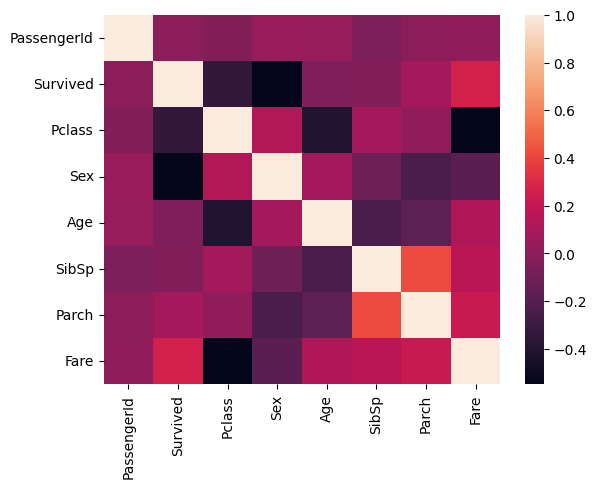

In [33]:
sns.heatmap(df.select_dtypes(include='number').corr())

In [6]:
# calcular a mediana de idade da pclass

mediana_pclass1 = df[df['Pclass'] == 1]['Age'].median()
print(mediana_pclass1)

mediana_pclass2 = df[df['Pclass'] == 2]['Age'].median()
print(mediana_pclass2)

# calcular a mediana de idade da pclass
mediana_pclass3 = df[df['Pclass'] == 3]['Age'].median()
print(mediana_pclass3)

37.0
29.0
24.0


In [7]:
# Percorrer as linhas do df e, onde a linha de idade for nula, ira preencher com a mediana de acordo com o indice - Imputação

for i, valor in df.iterrows():
    if pd.isnull(valor['Age']):
        if valor['Pclass'] == 1:
            df.at[i, 'Age'] = mediana_pclass1
            
        elif valor['Pclass'] == 2:
            df.at[i, 'Age'] = mediana_pclass2
            
        elif valor['Pclass']  == 3:
            df.at[i, 'Age'] = mediana_pclass3

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Codificacao de Rotulos

df['Sex'].unique()
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
label_encoder = preprocessing.LabelEncoder()

df.loc[:, 'Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

/tmp/ipykernel_37378/292047973.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Sex'] = label_encoder.fit_transform(df['Sex'])


array([1, 0])

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# Codificacao One-hot encoded

one_hot_encoded_data = pd.get_dummies(df, columns=['Embarked'])
print(one_hot_encoded_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [14]:
df_reg = one_hot_encoded_data.drop(columns=['PassengerId','Name','Parch','Ticket','Cabin'])

In [15]:
df_reg.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,7.2500,0,0,1
1,1,1,0,38.0,1,71.2833,1,0,0
2,1,3,0,26.0,0,7.9250,0,0,1
3,1,1,0,35.0,1,53.1000,0,0,1
4,0,3,1,35.0,0,8.0500,0,0,1


In [16]:
df_reg.select_dtypes(include='number').corr()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,0.123784,0.040700,-0.081658,0.007763
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.159651,-0.059528,-0.026354,0.070941
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.040700,-0.059528,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,-0.081658,-0.026354,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,0.007763,0.070941,-0.166603,-0.778359,-0.496624,1.000000


<Axes: >

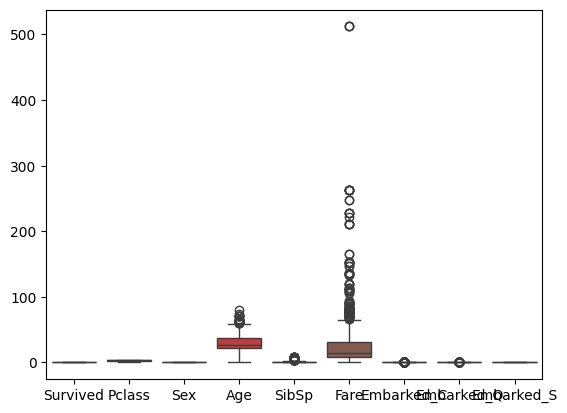

In [17]:
sns.boxplot(df_reg)

In [18]:
# Remocao dos outliers

Q1_age = np.percentile(df_reg['Age'], q=25)
Q3_age = np.percentile(df_reg['Age'], q=75)
IRQ_age = Q3_age - Q1_age
limite_inferior_age = Q1_age - (1.5 * IRQ_age)
limite_superior_age = Q3_age + (1.5 * IRQ_age)

Q1_fare = np.percentile(df_reg['Fare'], q=25)
Q3_fare = np.percentile(df_reg['Fare'], q=75)
IRQ_fare = Q3_fare - Q1_fare
limite_inferior_fare = Q1_fare - (1.5 * IRQ_fare)
limite_superior_fare = Q3_fare + (1.5 * IRQ_fare)

Q1_pclass = np.percentile(df_reg['Pclass'], q=25)
Q3_pclass = np.percentile(df_reg['Pclass'], q=75)
IRQ_pclass = Q3_pclass - Q1_pclass
limite_inferior_pclass = Q1_pclass - (1.5 * IRQ_pclass)
limite_superior_pclass = Q3_pclass + (1.5 * IRQ_pclass)

df_limpo = df_reg[
    (df_reg['Age'] >= limite_inferior_age) & (df_reg['Age'] <= limite_superior_age) &
    (df_reg['Fare'] >= limite_inferior_fare) & (df_reg['Fare'] <= limite_superior_fare) &
    (df_reg['Pclass'] >= limite_inferior_pclass) & (df_reg['Pclass'] <= limite_superior_pclass) 
]

In [19]:
# df_limpo = df_limpo.dropna()

<Axes: >

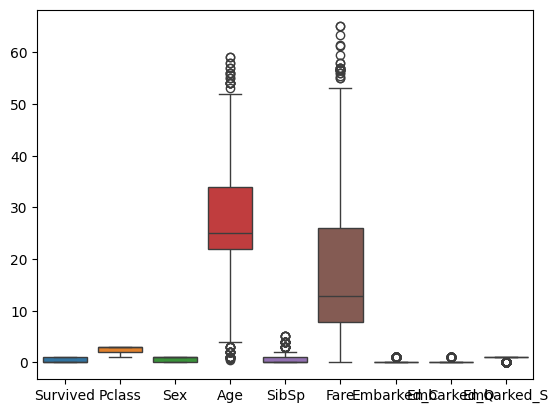

In [20]:
sns.boxplot(df_limpo)

In [21]:
df_limpo.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,7.2500,0,0,1
2,1,3,0,26.0,0,7.9250,0,0,1
3,1,1,0,35.0,1,53.1000,0,0,1
4,0,3,1,35.0,0,8.0500,0,0,1
5,0,3,1,24.0,0,8.4583,0,1,0


In [22]:
# Atributo alvo / dependente = Survived 

dados_independentes = df_limpo.drop(columns=['Survived']) # variaveis independentes
dados_dependentes = df_limpo.Survived # variaveis dependentes

In [23]:
dados_dependentes.value_counts()

0    495
1    260
Name: Survived, dtype: int64

In [24]:
# Padronizacao 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dados_independentes)
scaled_df = pd.DataFrame(scaled_data, columns=dados_independentes.columns)

print(scaled_df)

       Pclass       Sex       Age     SibSp      Fare  Embarked_C  Embarked_Q  \
0    0.694094  0.688919 -0.462615  0.608175 -0.771328   -0.419538   -0.327167   
1    0.694094 -1.451549 -0.117631 -0.492958 -0.721283   -0.419538   -0.327167   
2   -2.085966 -1.451549  0.658582  0.608175  2.628060   -0.419538   -0.327167   
3    0.694094  0.688919  0.658582 -0.492958 -0.712015   -0.419538   -0.327167   
4    0.694094  0.688919 -0.290123 -0.492958 -0.681743   -0.419538    3.056545   
..        ...       ...       ...       ...       ...         ...         ...   
750 -0.695936  0.688919 -0.031386 -0.492958 -0.345015   -0.419538   -0.327167   
751 -2.085966 -1.451549 -0.721353 -0.492958  0.915391   -0.419538   -0.327167   
752  0.694094 -1.451549 -0.290123  0.608175  0.429764   -0.419538   -0.327167   
753 -2.085966  0.688919 -0.117631 -0.492958  0.915391    2.383572   -0.327167   
754  0.694094  0.688919  0.399844 -0.492958 -0.734257   -0.419538    3.056545   

     Embarked_S  
0      0.

<Axes: >

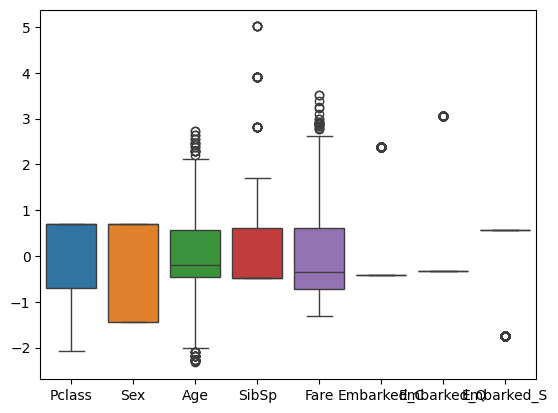

In [25]:
sns.boxplot(data = scaled_df)

In [26]:
# Atributo alvo / dependente = Survived 

X = scaled_df # independentes
y = dados_dependentes # dependentes

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Regressao Logistica

reg_log = LogisticRegression()

reg_log.fit(X_train, y_train)
predicao = reg_log.predict(X_test)

In [29]:
# Classificacao
print('Classificacao: \n{}'.format(classification_report(y_test,predicao)))

# Matriz de Confusao
print('Matriz de Confusao: \n{}'.format(confusion_matrix(y_test, predicao)))

Classificacao: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       150
           1       0.72      0.69      0.70        77

    accuracy                           0.80       227
   macro avg       0.78      0.77      0.78       227
weighted avg       0.80      0.80      0.80       227

Matriz de Confusao: 
[[129  21]
 [ 24  53]]


In [30]:
# SMOTE para resolver problemas de desequilivrio de clases
print('Antes do OverSampling, contagem do rotulo 1: {}'.format(sum(y_train == 1)))
print('Antes do OverSampling, contagem do rotulo 0: {}\n'.format(sum(y_train == 0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Apos do OverSampling, a forma do X_train: {}'.format(sum(x_train_res.shape)))
print('Apos do OverSampling, a forma do y_train: {}\n'.format(sum(y_train_res.shape)))

print('Apos do OverSampling, contagem do rotulo 1: {}'.format(sum(y_train_res == 1)))
print('Apos do OverSampling, contagem do rotulo 0: {}\n'.format(sum(y_train_res == 0)))

Antes do OverSampling, contagem do rotulo 1: 183
Antes do OverSampling, contagem do rotulo 0: 345

Apos do OverSampling, a forma do X_train: 698
Apos do OverSampling, a forma do y_train: 690

Apos do OverSampling, contagem do rotulo 1: 345
Apos do OverSampling, contagem do rotulo 0: 345



In [31]:
# Regressao Logistica com Sobreamostragem (SMOTE)

reg_log_smote = LogisticRegression()

reg_log_smote.fit(x_train_res, y_train_res)
predicao_smote = reg_log_smote.predict(X_test)


print('Classificacao: \n{}'.format(classification_report(y_test,predicao_smote)))
print('Matriz de Confusao: \n{}'.format(confusion_matrix(y_test, predicao_smote)))

Classificacao: 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       150
           1       0.63      0.77      0.69        77

    accuracy                           0.77       227
   macro avg       0.75      0.77      0.75       227
weighted avg       0.78      0.77      0.77       227

Matriz de Confusao: 
[[115  35]
 [ 18  59]]


In [32]:
# Regressao Logistica com Subamostragem (NearMiss)

nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

reg_log_miss = LogisticRegression()

reg_log_miss.fit(X_train_miss, y_train_miss)
predicao_miss = reg_log_miss.predict(X_test)


print('Classificacao: \n{}'.format(classification_report(y_test,predicao_miss)))
print('Matriz de Confusao: \n{}'.format(confusion_matrix(y_test, predicao_miss)))

Classificacao: 
              precision    recall  f1-score   support

           0       0.89      0.60      0.72       150
           1       0.52      0.86      0.65        77

    accuracy                           0.69       227
   macro avg       0.71      0.73      0.68       227
weighted avg       0.77      0.69      0.69       227

Matriz de Confusao: 
[[90 60]
 [11 66]]
